In [1]:
import os

import matplotlib.pyplot as plt # visualization
import numpy as np # linear algebra
import pandas as pd # data processing
import scipy

# Домашнаяя работа: работа с numpy, pandas и matplotlib

В этой домашней работе вам предстоит выполнить EDA (Exploratory Data Analysis) датасета с данными о футболистах FIFA.

Требования к выполнению домашней работы:
- Во всех графиках должны быть подписи через `title`, `legend`, etc.
- Убедитесь, что после сохранения ноутбука графики всё ещё видно, если открыть ноутбук заново. Если не видно - напишите в общий чатик, вам помогут либо преподаватели, либо те, кто уже столкнулся с этой проблемой
- Можно баловаться с цветами, но в меру. Если в итоге работа станет нечитаемой, то задание не будет засчитано
- Если вы сдаете работу в Google Colaboratory, убедитесь, что ваша тетрадка доступна по ссылке. Если в итоге по каким-то причинам тетрадка не будет открываться у преподавателя, задание не будет засчитано

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 88 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Photo                     18207 non-null  object 
 4   Nationality               18207 non-null  object 
 5   Flag                      18207 non-null  object 
 6   Overall                   18207 non-null  int64  
 7   Potential                 18207 non-null  int64  
 8   Club                      17966 non-null  object 
 9   Club Logo                 18207 non-null  object 
 10  Value                     18207 non-null  object 
 11  Wage                      18207 non-null  object 
 12  Special                   18207 non-null  int64  
 13  Preferred Foot            18159 non-null  object 
 14  Intern

In [27]:
df.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiv

In [26]:
df[['Wage']].head(10)

Wage
0  €565K
1  €405K
2  €290K
3  €260K
4  €355K
5  €340K
6  €420K
7  €455K
8  €380K
9   €94K

# Работа с датафреймом

In [7]:
total_columns = len(df.columns)

from pandas.api.types import is_numeric_dtype
totalNumeric = 0
for v in df.dtypes:
    if is_numeric_dtype(v):
        totalNumeric += 1
print('''
Заполните пропуски:

1. В датасете {} переменных 
2. Из них числовых {}
'''.format(total_columns, totalNumeric))


Заполните пропуски:

1. В датасете 88 переменных 
2. Из них числовых 43



# Работа с графикой

3. Изучите распределение возрастов с помощью колонки Age [px.histogram](https://plotly.com/python/histograms/)
4. Изучите [более продвинутые методы](https://plotly.com/python/distplot/) визуализации распределений 

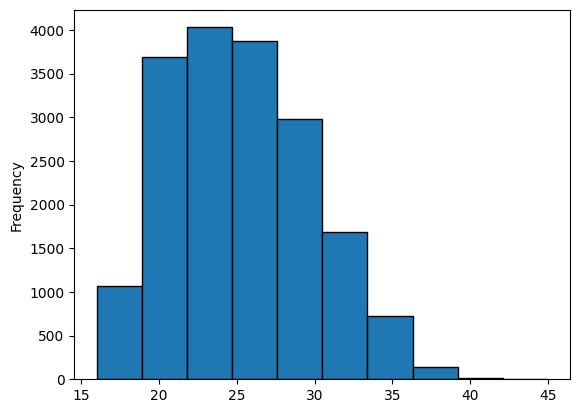

In [11]:
# 3.
df["Age"].plot(kind='hist', edgecolor='black');

5. Найдите колонку, показывающую, является ли футболист левой или правшой
6. Визуализируйте соотношенеие между левшами и правшами (считаем, что признак "левша"/"правша" определяет предпочтительную ногу для ударов

Соотношение правоножных к левоножным футболистам : 3.3122773687960105


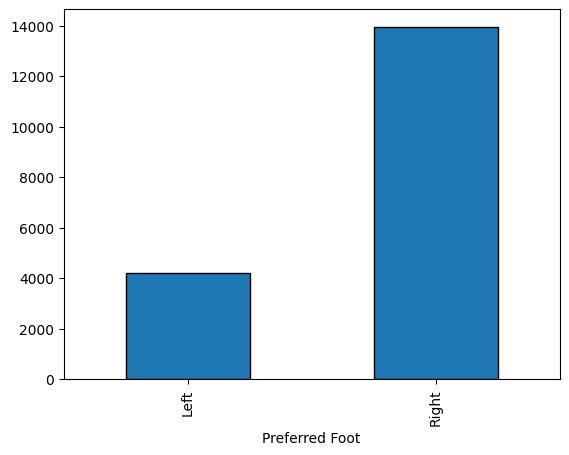

In [20]:
# 6.
groupedByFoot = df.groupby(["Preferred Foot"]).size();
groupedByFoot.plot(kind='bar', edgecolor='black');
print('Соотношение правоножных к левоножным футболистам : {}'.format(groupedByFoot["Right"] / groupedByFoot["Left"]));

7. Визуализируйте Международный Рейтинг футболистов (International Reputation)
8. Ассоциирован ли он с национальностью? С футбольным клубом? 

![Игроки](Players.png "Title")

                      International_Reputation
Nationality                                   
Oman                                  2.000000
United Arab Emirates                  2.000000
Togo                                  1.333333
Burundi                               1.333333
Central African Rep.                  1.333333
...                                        ...
Indonesia                             1.000000
India                                 1.000000
Hong Kong                             1.000000
Haiti                                 1.000000
Zimbabwe                              1.000000

[164 rows x 1 columns]
                     International_Reputation
Club                                         
Juventus                             2.520000
FC Bayern München                    2.517241
FC Barcelona                         2.242424
Paris Saint-Germain                  2.233333
Inter                                2.166667
...                                       .

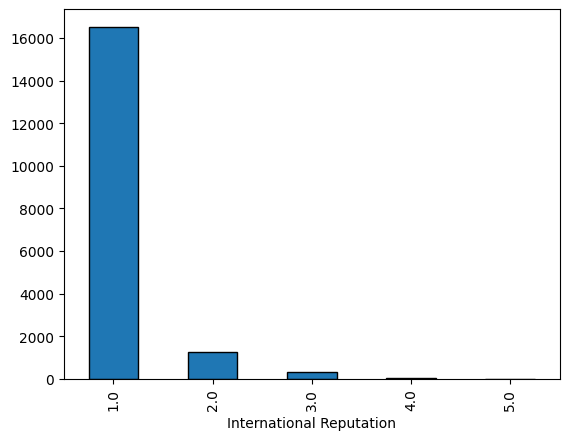

In [32]:
# 7.
df.groupby(["International Reputation"]).size().plot(kind='bar', edgecolor='black');
# 8.
print(df.groupby("Nationality").agg(International_Reputation=("International Reputation", "mean")).sort_values(by=["International_Reputation"], ascending=False));
print(df.groupby("Club").agg(International_Reputation=("International Reputation", "mean")).sort_values(by=["International_Reputation"], ascending=False));

Зависимости рейтинга от страны игрока практически нет. Игроки из наиболее развитых в плане футбола стран оказались в середине рейтинга, а страны, из которых меньше всего игроков, оказались вверху и внизу, так как из-за недостаточности выборки из этих стран средний рейтинг их игроков "перекосило" вверх или вниз соответственно. 
Рейтинг хорошо коррелирует с клубом, из которого игрок. Так, средний рейтинг игроков по клубу оказался выше у клубов, имеющих высокие показатели в евролигах.

9. Есть ли зависимость между потенциалом (Potential) и Международным Рейтингом футболистов (International Reputation)? Визуализируте её
10. Влияет ли на потенциал игровая нога? Почему так может случиться? (картинка в тему)

![Коазуация или корреляция?](causuation.png "???")

Preferred Foot
Left     71.739492
Right    71.192214
Name: Potential, dtype: float64

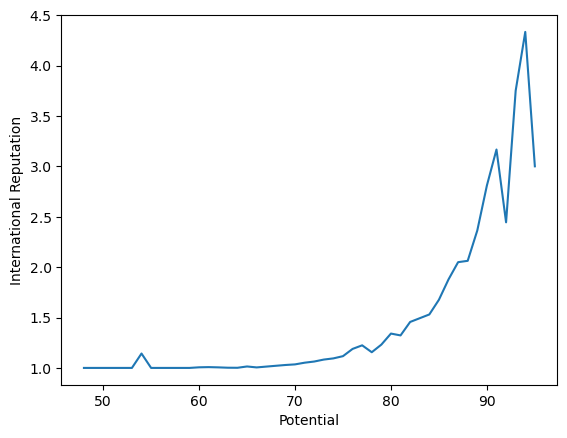

In [44]:
# 9.
df.groupby("Potential")["International Reputation"].agg("mean").plot(x="Potential", y="International Reputation", ylabel="International Reputation")
# 10.
df.groupby(["Preferred Foot"])["Potential"].mean()

Если брать среднее от потенциала всех левш и правш, то потенциал почти равен. Если взять сумму, то, конечно, у правш она будет больше для каждого целого значения потенциала в интервале [0;100], так как самих правш больше.

Теперь пройдёмся по показателям игроков...

11. Есть ли зависимость между **выносливостью** игрока (Stamina) и его **силой** (Strength)? Какая? Точно ли это зависимость? 


<AxesSubplot:xlabel='Strength', ylabel='Average stamina'>

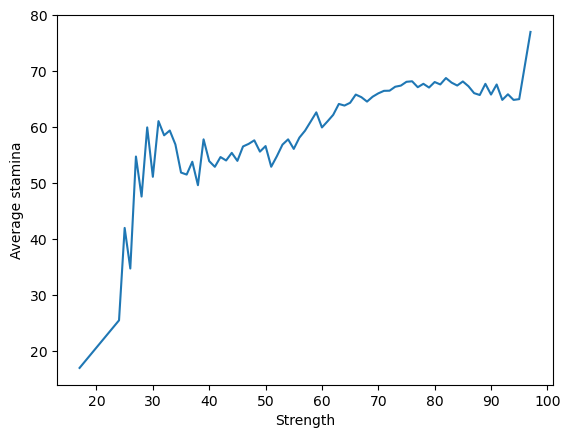

In [52]:
# 11.
df.groupby("Strength")["Stamina"].agg("mean").reset_index(name='Stamina').plot(x='Strength', y='Stamina', ylabel='Average stamina', legend=False)


11. В целом некоторая зависимость выносливости от силы есть

12. Зависит ли **стоимость** игрока (Value) от его "**финтов**" (Skill Moves)?

<AxesSubplot:xlabel='Skill Moves', ylabel='Value, million euro'>

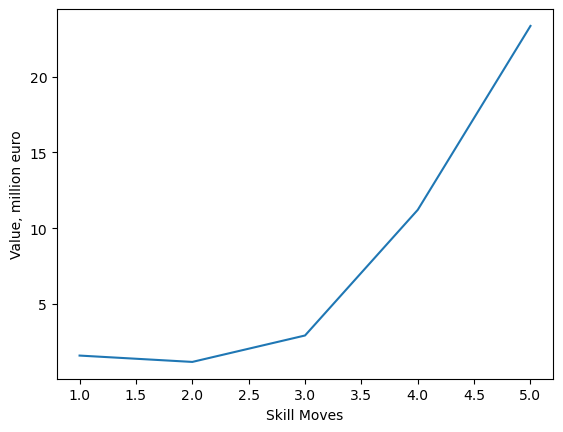

In [22]:
# 12.
def valueToNumber(val: str):
    val = val.replace('€', '')
    mult = 1
    if 'K' in val:
        mult = 1000
        val = val.replace('K', '')
    if 'M' in val:
        mult = 1000000
        val = val.replace('M', '')
    return float(val) * mult / 1000000

df_value_converted = df.copy()
df_value_converted["Value"] = df["Value"].apply(valueToNumber)
df_value_converted.groupby('Skill Moves')['Value'].mean().plot(ylabel='Value, million euro', x='Skill Moves')

Зависимость стоимости от финтов напоминает график экспоненциальной функции. Зависимость есть  

13. Покажите распределения основных характеристик игроков: **рост**, **вес**, **возраст** по **позициям** (Position), сделайте выводы

Position
CAM    AxesSubplot(0.125,0.11;0.775x0.77)
CB     AxesSubplot(0.125,0.11;0.775x0.77)
CDM    AxesSubplot(0.125,0.11;0.775x0.77)
CF     AxesSubplot(0.125,0.11;0.775x0.77)
CM     AxesSubplot(0.125,0.11;0.775x0.77)
GK     AxesSubplot(0.125,0.11;0.775x0.77)
LAM    AxesSubplot(0.125,0.11;0.775x0.77)
LB     AxesSubplot(0.125,0.11;0.775x0.77)
LCB    AxesSubplot(0.125,0.11;0.775x0.77)
LCM    AxesSubplot(0.125,0.11;0.775x0.77)
LDM    AxesSubplot(0.125,0.11;0.775x0.77)
LF     AxesSubplot(0.125,0.11;0.775x0.77)
LM     AxesSubplot(0.125,0.11;0.775x0.77)
LS     AxesSubplot(0.125,0.11;0.775x0.77)
LW     AxesSubplot(0.125,0.11;0.775x0.77)
LWB    AxesSubplot(0.125,0.11;0.775x0.77)
RAM    AxesSubplot(0.125,0.11;0.775x0.77)
RB     AxesSubplot(0.125,0.11;0.775x0.77)
RCB    AxesSubplot(0.125,0.11;0.775x0.77)
RCM    AxesSubplot(0.125,0.11;0.775x0.77)
RDM    AxesSubplot(0.125,0.11;0.775x0.77)
RF     AxesSubplot(0.125,0.11;0.775x0.77)
RM     AxesSubplot(0.125,0.11;0.775x0.77)
RS     AxesSubplot(0.125,

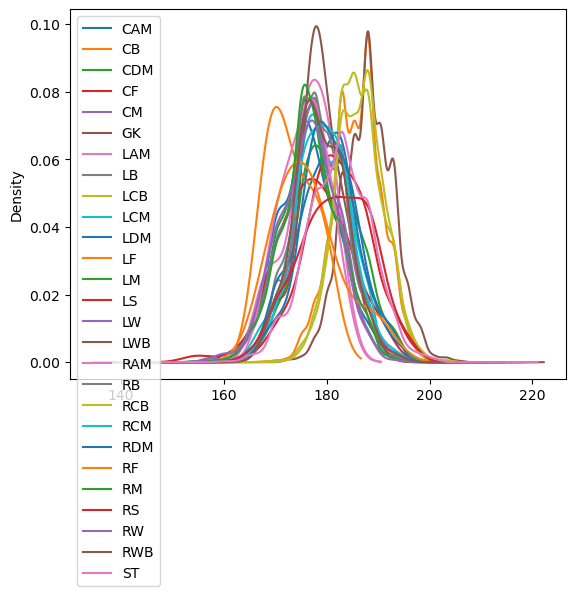

In [4]:
# 13.

def heightToSm(val):
    #6'1
    if pd.isna(val):
        return 0
    val = str(val)
    splitted = val.split('\'')
    if len(splitted) == 2:
        h_inch_s = splitted[1]
    else:
        h_inch_s = 0
    h_ft_s = splitted[0]
    h_inch = int(h_inch_s)
    h_ft = int(h_ft_s)
    h_inch += h_ft * 12
    h_cm = round(h_inch * 2.54, 1)
    return h_cm

df_height_converted = df.copy()
df_height_converted["Height"] = df["Height"].apply(heightToSm)

df_height_converted.groupby("Position")["Height"].plot.kde(xlabel = 'Height', legend=True)

Position
CAM    AxesSubplot(0.125,0.11;0.775x0.77)
CB     AxesSubplot(0.125,0.11;0.775x0.77)
CDM    AxesSubplot(0.125,0.11;0.775x0.77)
CF     AxesSubplot(0.125,0.11;0.775x0.77)
CM     AxesSubplot(0.125,0.11;0.775x0.77)
GK     AxesSubplot(0.125,0.11;0.775x0.77)
LAM    AxesSubplot(0.125,0.11;0.775x0.77)
LB     AxesSubplot(0.125,0.11;0.775x0.77)
LCB    AxesSubplot(0.125,0.11;0.775x0.77)
LCM    AxesSubplot(0.125,0.11;0.775x0.77)
LDM    AxesSubplot(0.125,0.11;0.775x0.77)
LF     AxesSubplot(0.125,0.11;0.775x0.77)
LM     AxesSubplot(0.125,0.11;0.775x0.77)
LS     AxesSubplot(0.125,0.11;0.775x0.77)
LW     AxesSubplot(0.125,0.11;0.775x0.77)
LWB    AxesSubplot(0.125,0.11;0.775x0.77)
RAM    AxesSubplot(0.125,0.11;0.775x0.77)
RB     AxesSubplot(0.125,0.11;0.775x0.77)
RCB    AxesSubplot(0.125,0.11;0.775x0.77)
RCM    AxesSubplot(0.125,0.11;0.775x0.77)
RDM    AxesSubplot(0.125,0.11;0.775x0.77)
RF     AxesSubplot(0.125,0.11;0.775x0.77)
RM     AxesSubplot(0.125,0.11;0.775x0.77)
RS     AxesSubplot(0.125,

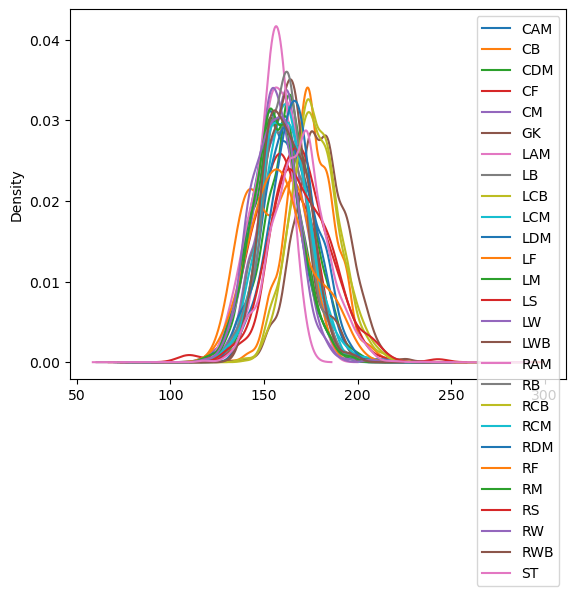

In [7]:
def weihtToNumber(weight_str):
    if pd.isna(weight_str):
        return 0
    weight_str = weight_str.replace('lbs', '')
    return int(weight_str)

df_weight_converted = df.copy()
df_weight_converted["Weight"] = df_weight_converted["Weight"].apply(weihtToNumber)
df_weight_converted = df_weight_converted[df_weight_converted["Weight"] != 0]
df_weight_converted.groupby("Position")["Weight"].plot.kde(xlabel = 'Weight, lbs', legend=True)

Position
CAM    AxesSubplot(0.125,0.11;0.775x0.77)
CB     AxesSubplot(0.125,0.11;0.775x0.77)
CDM    AxesSubplot(0.125,0.11;0.775x0.77)
CF     AxesSubplot(0.125,0.11;0.775x0.77)
CM     AxesSubplot(0.125,0.11;0.775x0.77)
GK     AxesSubplot(0.125,0.11;0.775x0.77)
LAM    AxesSubplot(0.125,0.11;0.775x0.77)
LB     AxesSubplot(0.125,0.11;0.775x0.77)
LCB    AxesSubplot(0.125,0.11;0.775x0.77)
LCM    AxesSubplot(0.125,0.11;0.775x0.77)
LDM    AxesSubplot(0.125,0.11;0.775x0.77)
LF     AxesSubplot(0.125,0.11;0.775x0.77)
LM     AxesSubplot(0.125,0.11;0.775x0.77)
LS     AxesSubplot(0.125,0.11;0.775x0.77)
LW     AxesSubplot(0.125,0.11;0.775x0.77)
LWB    AxesSubplot(0.125,0.11;0.775x0.77)
RAM    AxesSubplot(0.125,0.11;0.775x0.77)
RB     AxesSubplot(0.125,0.11;0.775x0.77)
RCB    AxesSubplot(0.125,0.11;0.775x0.77)
RCM    AxesSubplot(0.125,0.11;0.775x0.77)
RDM    AxesSubplot(0.125,0.11;0.775x0.77)
RF     AxesSubplot(0.125,0.11;0.775x0.77)
RM     AxesSubplot(0.125,0.11;0.775x0.77)
RS     AxesSubplot(0.125,

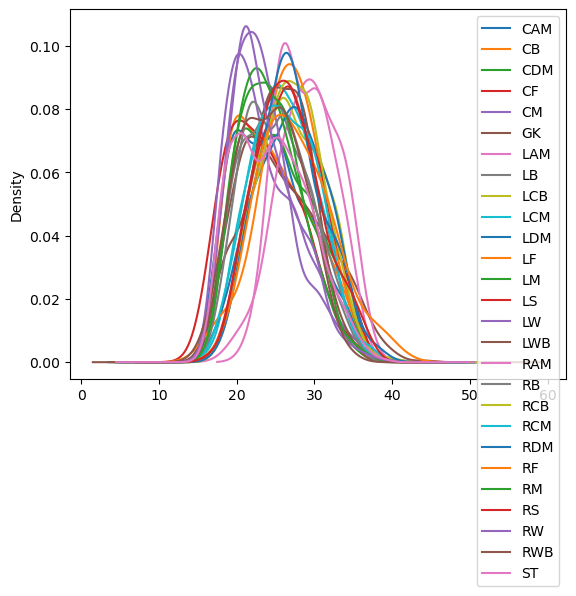

In [6]:
df.groupby("Position")["Age"].plot.kde(xlabel = 'Age, years', legend=True)

14. Есть ли зависимость **скорости** (SprintSpeed) от **веса** и **роста**? От **национальности**?

<AxesSubplot:xlabel='BMI', ylabel='Sprint speed'>

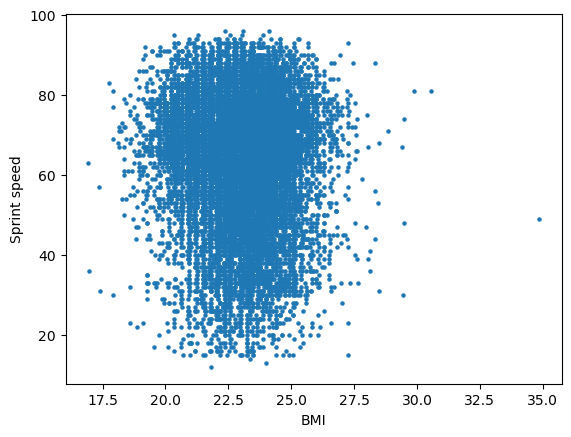

In [9]:
# 14. Зависимость от индекса массы тела более показательна
df["Height"] = df["Height"].apply(heightToSm)
df["Weight"] = df["Weight"].apply(weihtToNumber)
df["BMI"] = (df["Weight"] * 0.45359237) / ((df["Height"] / 100) ** 2)
df.plot.scatter(x ='BMI', y='SprintSpeed', ylabel='Sprint speed', s=5)


In [8]:
# 14. Зависимость скорости от национальности (в виде таблицы, так как параметр "национальность" - нечисловой)
df.groupby('Nationality')["SprintSpeed"].mean().sort_values(ascending=False)

Nationality
Liberia              92.000000
Fiji                 90.000000
Tanzania             82.333333
Antigua & Barbuda    81.750000
Chad                 81.500000
                       ...    
Belarus              53.500000
Latvia               52.000000
Hong Kong            50.500000
Qatar                48.000000
Puerto Rico          43.000000
Name: SprintSpeed, Length: 164, dtype: float64

15. Под какими номерами чаще всего играют нападающие? Визуализируйте частотность

In [3]:
# 15.
df.loc[df["Position"].isin(["LS", "ST", "RS", "LW", "LF", "CF", "RF", "RW"])].groupby("Jersey Number")["ID"].count().sort_values(ascending=False)


Jersey Number
9.0     488
11.0    259
19.0    199
10.0    183
7.0     164
       ... 
61.0      1
59.0      1
58.0      1
57.0      1
67.0      1
Name: ID, Length: 86, dtype: int64

16. Есть ли за зависимость **силы удара** (ShotPower) от **ведущей ноги**? от **агрессивности** (Aggression)? 


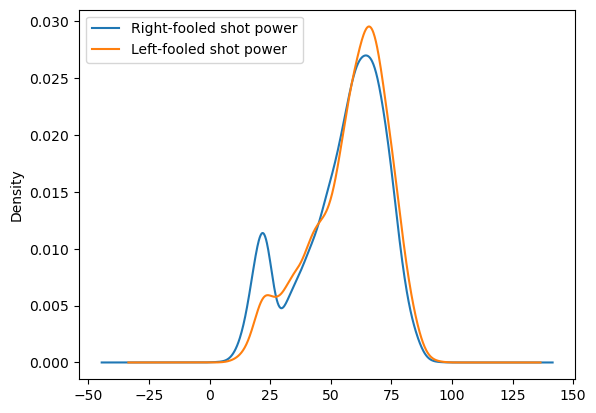

In [13]:
ax = df.loc[df["Preferred Foot"] == "Right"]["ShotPower"].plot.kde(x = 'ShotPower')
ax = df.loc[df["Preferred Foot"] == "Left"]["ShotPower"].plot.kde(x = 'ShotPower', ax = ax)
ax.legend(['Right-fooled shot power', 'Left-fooled shot power'])

<AxesSubplot:xlabel='Aggression', ylabel='Average shot power'>

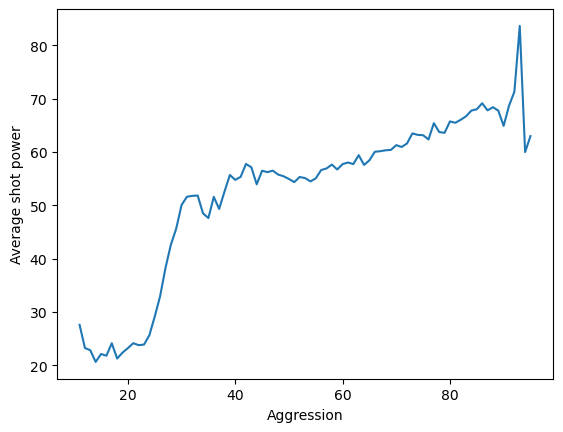

In [54]:
# 16. сила удара от агрессивности
df.groupby("Aggression")["ShotPower"].mean().reset_index(name='ShotPowerAvg').plot.line(x='Aggression', y='ShotPowerAvg', ylabel='Average shot power', legend=False)


Зависимости от ведущей ноги практически нет. От агрессивности есть зависимость, чем-то похожая на линейную(если убрать шум и сгладить) с некоторым множителем.

17. Найдите суммарную стоимость игроков в каждом клубе
18. Визуализируйте соотношение сумарной стоимости топ 10 клубов

In [20]:
# 17.
df_value_converted = df.copy()
df_value_converted["Value"] = df_value_converted["Value"].apply(valueToNumber)
df_value_converted.groupby("Club")["Value"].sum().reset_index(name="Sum, million euro").sort_values(by="Sum, million euro", ascending=False)


Club  Sum, million euro
470        Real Madrid            874.425
212       FC Barcelona            852.600
374    Manchester City            786.555
326           Juventus            704.475
214  FC Bayern München            679.025
..                 ...                ...
543       Sligo Rovers              3.295
83         Bohemian FC              3.195
188         Derry City              2.795
361        Limerick FC              2.040
92      Bray Wanderers              1.930

[651 rows x 2 columns]

<AxesSubplot:xlabel='Club'>

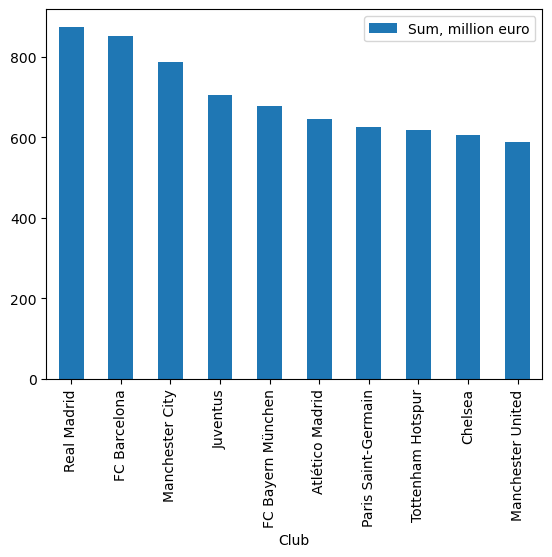

In [21]:
# 18.
df_value_converted.groupby("Club")["Value"].sum().reset_index(
    name="Sum, million euro").sort_values(by="Sum, million euro", ascending=False).head(10).plot.bar(x='Club', y='Sum, million euro')

19. Есть ли зависимость между продолжительностью контракта игрока и его стоимостью? 

<AxesSubplot:xlabel='Contract duration, month', ylabel='Value, million euro'>

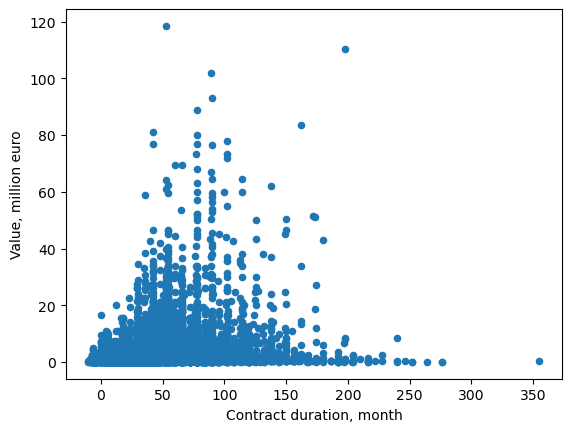

In [56]:
# 19.
from dateutil.parser import parse as date_parse
import datetime

def diff_month(d1, d2):
    return (d1.year - d2.year) * 12 + d1.month - d2.month

def contract_duration(row: pd.Series):
    if row["Contract Valid Until"] == None or row["Joined"] == None or pd.isna(row["Contract Valid Until"]) or pd.isna(row["Joined"]):
        return -1
    until_str = row["Contract Valid Until"]
    until_time = date_parse(
        str(until_str), default=datetime.datetime(2023, 1, 1))
    from_str = row["Joined"]
    from_time = date_parse(str(from_str))
    month_diff = diff_month(until_time, from_time)
    return month_diff
df_contract_dur_converted = df.copy()
df_contract_dur_converted["Value"] = df_contract_dur_converted["Value"].apply(valueToNumber)
df_contract_dur_converted["ContractDuration"] = df_contract_dur_converted.apply(
    contract_duration, axis=1)
df_contract_dur_converted = df_contract_dur_converted.loc[df_contract_dur_converted["ContractDuration"] != -1]
df_contract_dur_converted[["ContractDuration", "Value"]].plot.scatter(x='ContractDuration', y='Value', xlabel='Contract duration, month', ylabel='Value, million euro')


Я не вижу какой-то прямой зависимости. Сгруппировал по продолжительности контракта и вывел среднюю стоимость для каждой продолжительности - зависимости нет

<AxesSubplot:xlabel='Contract duration, month', ylabel='Average players value, million euro'>

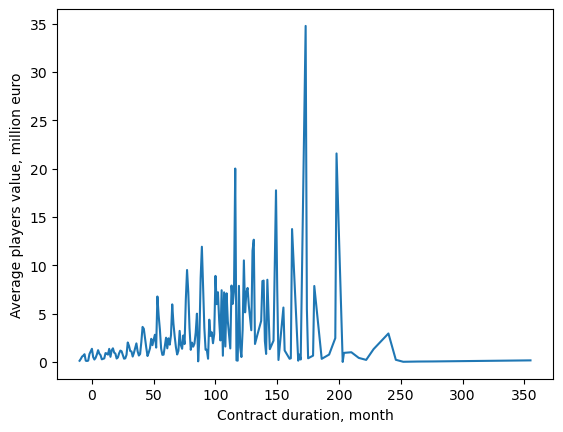

In [27]:
# 19.
df_contract_dur_converted.groupby("ContractDuration")["Value"].mean().plot.line(xlabel='Contract duration, month', ylabel='Average players value, million euro')


20. В какой год будет больше всего свободных игроков на рынке (исходя из этих данных)? Визуализируйте зависимость

<AxesSubplot:xlabel='Contract Valid Until', ylabel='Count of players with contract ending year'>

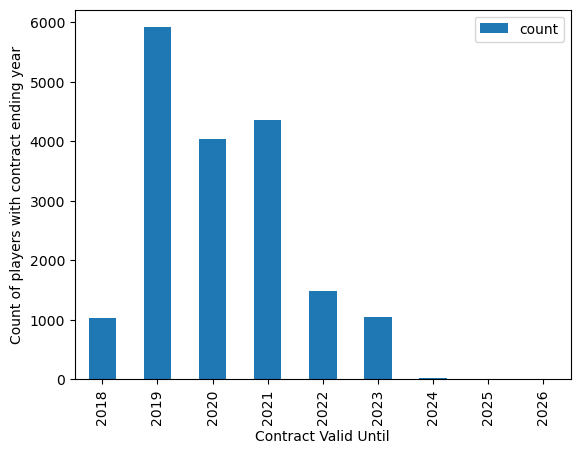

In [30]:
# 20.
def contract_end_year(val):
    if val == None or pd.isna(val):
        return -1
    end_year = date_parse(str(val)).year
    return end_year

df_contract_dur_converted = df.copy()
df_contract_dur_converted["Value"] = df_contract_dur_converted["Value"].apply(valueToNumber)
df_contract_dur_converted["Contract Valid Until"] = df_contract_dur_converted["Contract Valid Until"].apply(contract_end_year)
df_contract_dur_converted = df_contract_dur_converted.loc[df_contract_dur_converted["Contract Valid Until"] != -1]

df_contract_dur_converted.groupby("Contract Valid Until").size().reset_index(name='count').plot.bar(x="Contract Valid Until", y='count', ylabel='Count of players with contract ending year')


21. Есть ли зависмость **потенциала** (Potential) игрока от **возраста**?
22. Всегда ли молодые игроки обладают большим потенциалом?

<AxesSubplot:xlabel='Age', ylabel='Average potential'>

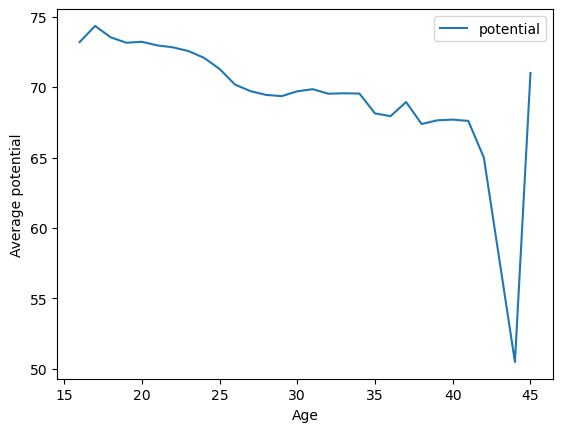

In [31]:
# 21.
df.groupby('Age')['Potential'].mean().reset_index(name='potential').plot.line(
    x='Age', y='potential', ylabel='Average potential')

В основном с годами потенциал снижается. "Пила" в конце графика объясняется тем, что для возраста 40+ очень маленькая выборка, и в целом этот промежуток можно вообще не брать в рассчет.

<AxesSubplot:xlabel='Age', ylabel='Potential'>

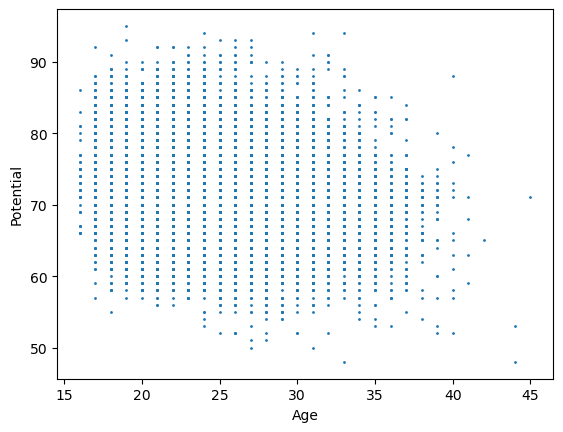

In [32]:
# 22.
df.plot.scatter(x='Age', y="Potential", s=1)

Молодых игроков в целом больше. Не все они обладают высоким потенциалом, как видно из диаграммы рассеяния.

23. Есть ли зависимость **рейтинга** игрока (Overall) от **возраста**?
24. Когда у игроков "пик" карьеры?
25. Игроков какого возраста больше всего с рейтингом 90+?

<AxesSubplot:xlabel='Age', ylabel='Overall'>

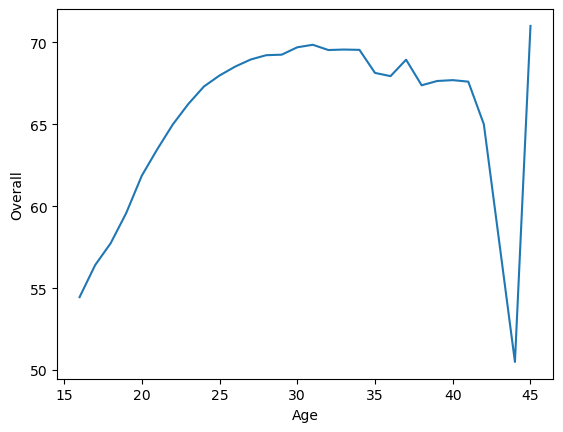

In [58]:
# 23.
df.groupby('Age')['Overall'].mean().reset_index(name='Overall').plot.line(x='Age', y='Overall', ylabel='Overall', legend=False)

<AxesSubplot:xlabel='Age'>

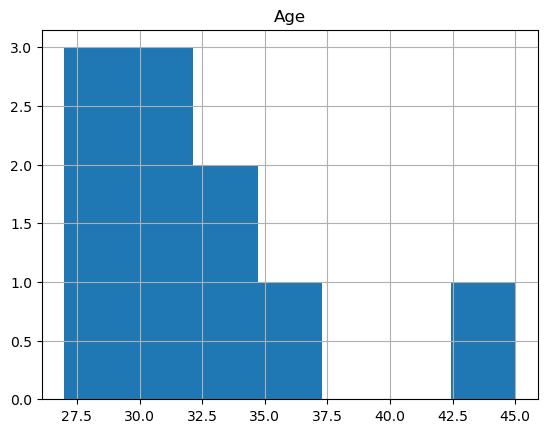

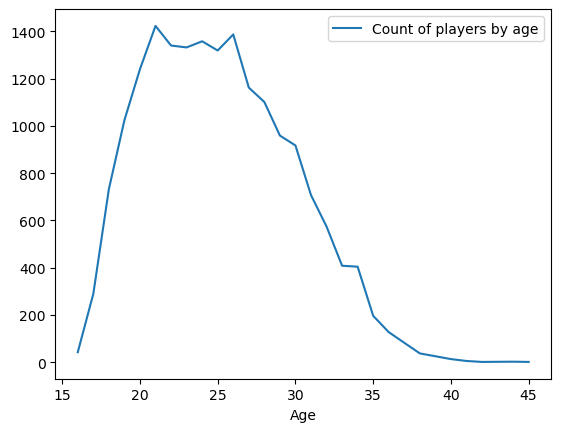

In [36]:
# 24.
df.groupby('Age')['Overall'].mean().reset_index(name='Overall').sort_values(by='Overall', ascending=False).head(10).hist(column='Age', bins=7)
df.groupby('Age')['Overall'].size().reset_index(name='Count of players by age').plot.line(x='Age' ,y='Count of players by age')

Пик карьеры с 27.5 до 32.5. Однако, учитывая то, что кол-во игроков начинает падать после 30, то пик карьеры игрока вероятнее всего будет с 27.5 до 30 лет.

<AxesSubplot:xlabel='Age', ylabel='Count'>

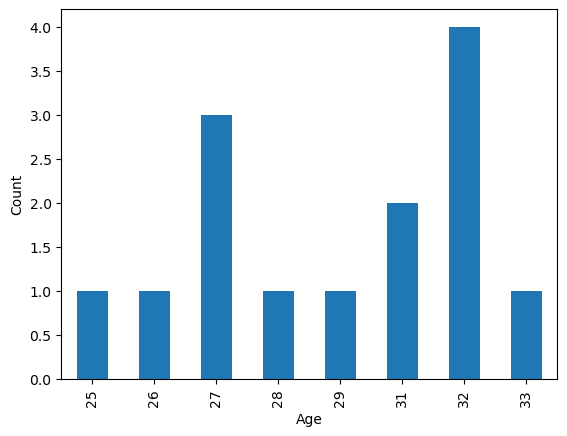

In [39]:
# 25.
df.loc[df["Overall"] >= 90].groupby("Age")["ID"].agg('count').reset_index(
    name='Count').sort_values(by='Age', ascending=True).plot.bar(x='Age', y='Count', ylabel='Count', legend=False)

Наибольшему кол-ву людей с рейтингом 90+ на момент опубликования данных было 32 года - таких было 4 человека.

26. Насколько средняя зарплата (Wage) игроков с рейтингом (Overall) 90+ больше средней зарплаты с рейтингом [80 - 90]? Визуализируйте возможную зависимость

<AxesSubplot:xlabel='group_name', ylabel='Wage, thousand euro'>

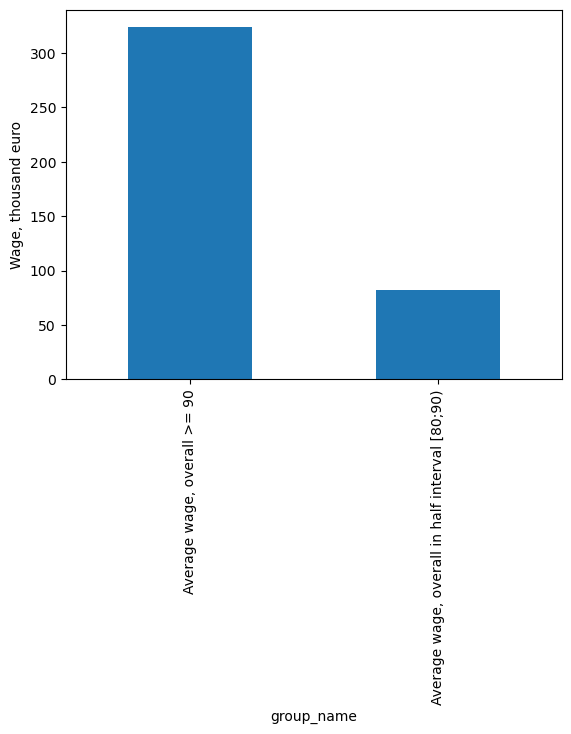

In [59]:
# 26.
def value_to_number_thousand(val: str):
    return valueToNumber(val) * 1000

df_value_converted = df.copy()
df_value_converted["Wage"] = df_value_converted["Wage"].apply(value_to_number_thousand)
mean_90_plus = df_value_converted.loc[df_value_converted["Overall"] >= 90]["Wage"].mean()
mean_80_90 = df_value_converted.loc[(df_value_converted["Overall"] < 90) & (df_value_converted["Overall"] >= 80)]["Wage"].mean()

df_bar_wage = pd.DataFrame(data={'group_name': ['Average wage, overall >= 90', 'Average wage, overall in half interval [80;90)'], 'Wage': [mean_90_plus, mean_80_90]})
df_bar_wage.plot.bar(x='group_name', y='Wage', ylabel='Wage, thousand euro', legend=False)

